# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
# loading the data
df = pd.read_csv('diabetes.csv', index_col=False)

In [188]:
# Take a first look into the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [189]:
# Use describe() to show the descriptive statistic of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notes:
- There are some variables have min value is 0, which is very unlikely such as `Glucose`, `BloodPressure`, `SkinThickness`, `BMI`...
- This could be issues about the missing data in these variables

In [190]:
# See about the shape and columns
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Note: 
- 768 observations (data points)
- `Outcome` is categorical variable but looks like numerical.
- We should group the Age into appropriate group for analysis

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

#### Handling Missing Values

In [9]:
# Handling missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [100]:
# Detection of variables with missing observations filled with zero in the data set.
zero_colunms = [col for col in df.columns if (df[col].min() == 0 and col not in  ["Pregnancies", "Outcome"])]

In [101]:
# Filling the missing observations in the dataset with NaN that are filled with zero.
for col in zero_colunms:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [104]:
# checking the misssing values
missing_cols = df.columns[df.isnull().sum() > 0]
missing_cols

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [107]:
df[df['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [108]:
# filling the missing values
for col in missing_cols:
    df.loc[df[col].isnull(), col] = df[col].median()


In [109]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [118]:
# checking duplicates
duplicateRows = df[df.duplicated()]

print(duplicateRows)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Notes:
- There is no duplicated rows

#### Handling Outliers

In [220]:
# define numerical columns and categorical columns
num_feats = df.columns[~df.columns.isin(['Outcome'])]


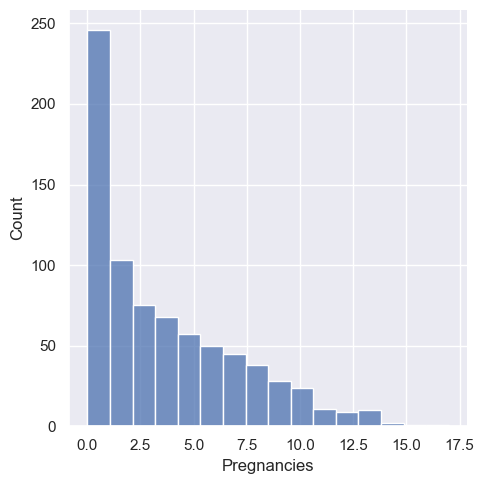

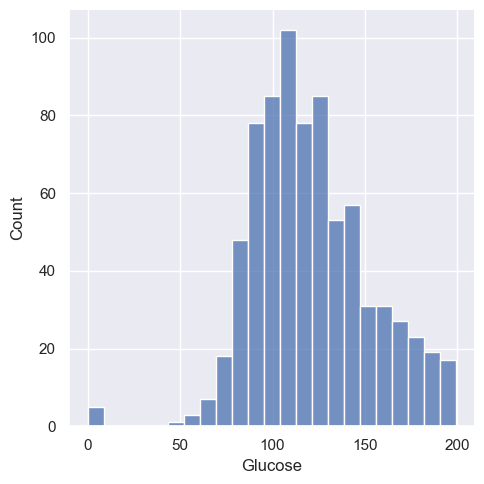

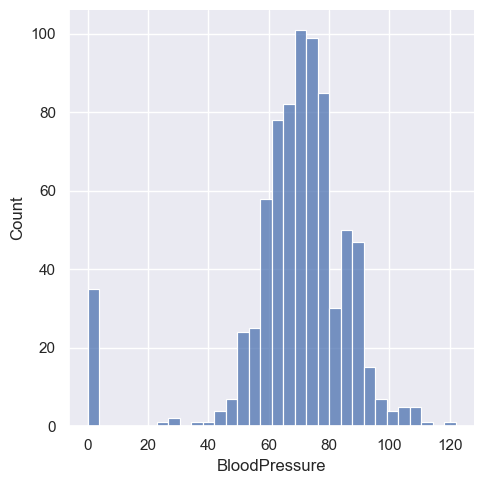

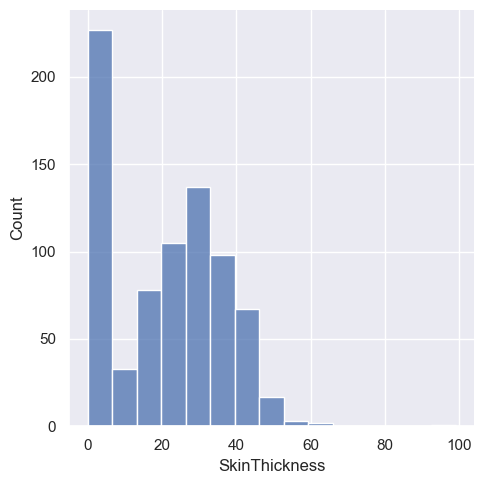

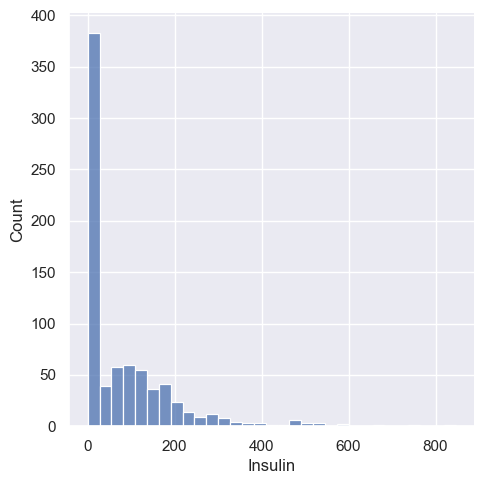

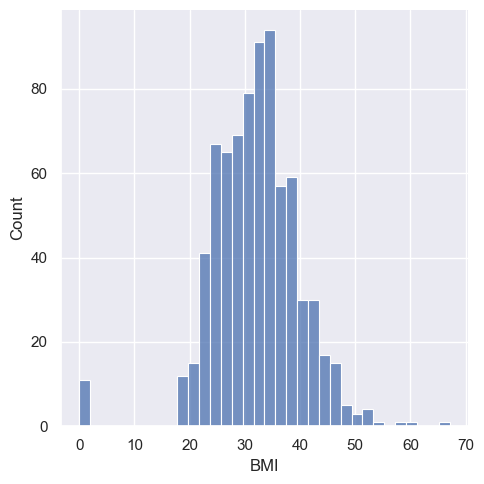

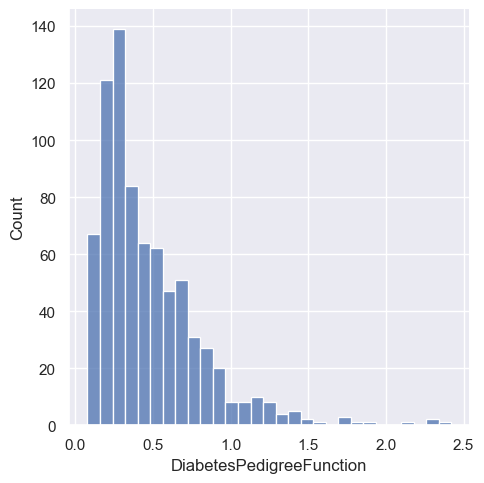

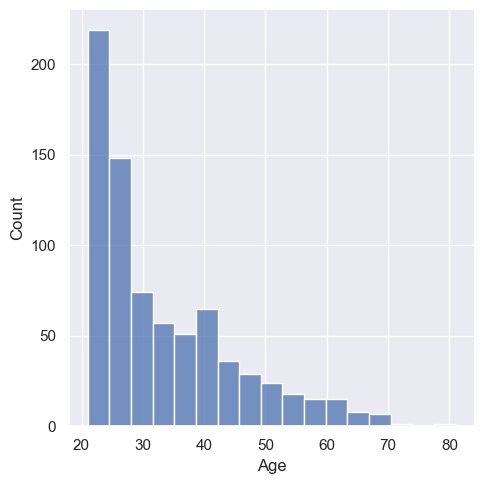

In [221]:
# Handle outliers
sns.set_theme()
for column in num_feats:
    sns.displot(df[column])

<Axes: >

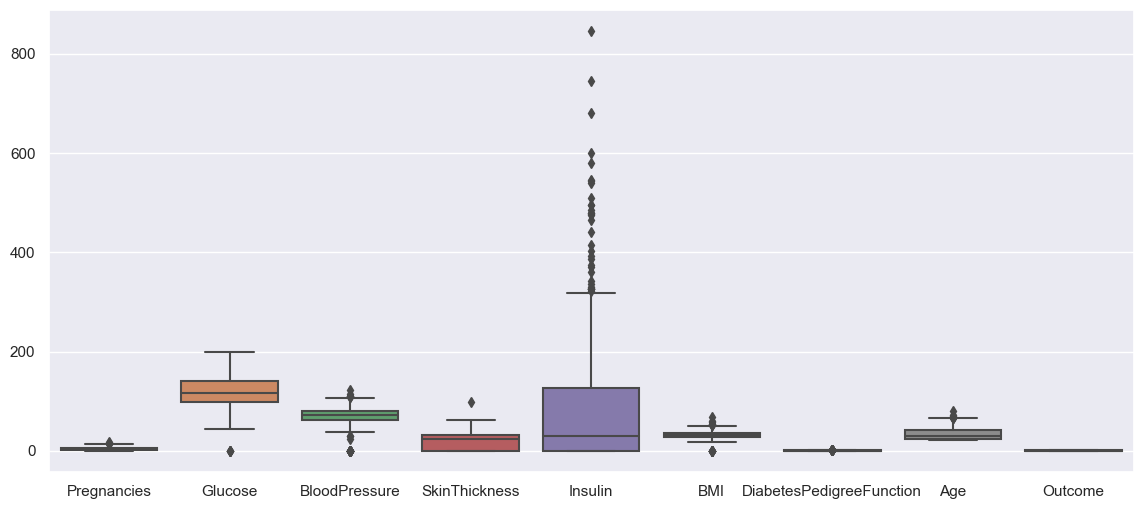

In [222]:
fig = plt.figure(figsize=(14,6))
sns.boxplot(df)

Notes:
- There are many outliers in `Insulin` feature

In [223]:
# Outlier Analysis
def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [224]:
# We are replacing the outliers according to the IQR method.
def replace_with_thresholds(dataframe, variable, q1=0.20, q3=0.80):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.20, q3=0.80)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for feat in num_feats:
    replace_with_thresholds(df, feat)

In [225]:
# We are checking the outlier analysis again for control
for feat in num_feats:
    print(feat, check_outlier(df, feat))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


#### Scaling and Normalization

In [226]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Declare a standard scaler instance
scaler = StandardScaler()

# Scaling the numerical features
df_train_scaled = pd.DataFrame(scaler.fit_transform(df[num_feats]))

In [227]:
df_train_scaled

,0,1,2,3,4,5,6,7
0,0.641267,0.855352,0.108990,0.912126,-0.763760,0.205297,0.542511,1.432260
1,-0.845728,-1.140854,-0.282761,0.534134,-0.763760,-0.743858,-0.376999,-0.190375
2,1.236064,1.964354,-0.413345,-1.292824,-0.763760,-1.191316,0.692431,-0.104973
3,-0.845728,-1.014111,-0.282761,0.156143,0.185885,-0.540467,-0.990005,-1.044393
4,-1.143127,0.506808,-1.980348,0.912126,0.933478,1.493436,3.079158,-0.019571
...,...,...,...,...,...,...,...,...
763,1.830862,-0.633881,0.370157,1.731107,1.054709,0.110382,-0.976679,2.542483
764,-0.548329,0.031521,-0.021594,0.408137,-0.763760,0.639196,-0.413646,-0.531982
765,0.343868,-0.000165,0.108990,0.156143,0.367732,-0.798095,-0.730144,-0.275777
766,-0.845728,0.158264,-0.674512,-1.292824,-0.763760,-0.269280,-0.383662,1.176054


In [228]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=8, step=1)


In [229]:
df_train_scaled.columns = num_feats
print(df_train_scaled.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [230]:
print(df_train_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.641267  0.855352       0.108990       0.912126 -0.763760  0.205297   
1      -0.845728 -1.140854      -0.282761       0.534134 -0.763760 -0.743858   
2       1.236064  1.964354      -0.413345      -1.292824 -0.763760 -1.191316   
3      -0.845728 -1.014111      -0.282761       0.156143  0.185885 -0.540467   
4      -1.143127  0.506808      -1.980348       0.912126  0.933478  1.493436   
..           ...       ...            ...            ...       ...       ...   
763     1.830862 -0.633881       0.370157       1.731107  1.054709  0.110382   
764    -0.548329  0.031521      -0.021594       0.408137 -0.763760  0.639196   
765     0.343868 -0.000165       0.108990       0.156143  0.367732 -0.798095   
766    -0.845728  0.158264      -0.674512      -1.292824 -0.763760 -0.269280   
767    -0.845728 -0.887367      -0.021594       0.660132 -0.763760 -0.228602   

     DiabetesPedigreeFunction       Age

In [231]:
# # Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df_train_normalized = scaler.fit_transform(df[num_feats])

print(df_train_normalized)

[[0.375      0.71978022 0.51136364 ... 0.53676471 0.41895604 0.56862745]
 [0.0625     0.37362637 0.44318182 ... 0.38970588 0.20833333 0.19607843]
 [0.5        0.91208791 0.42045455 ... 0.32037815 0.4532967  0.21568627]
 ...
 [0.3125     0.57142857 0.51136364 ... 0.38130252 0.127442   0.17647059]
 [0.0625     0.5989011  0.375      ... 0.46323529 0.20680708 0.50980392]
 [0.0625     0.41758242 0.48863636 ... 0.46953782 0.18086081 0.03921569]]


#### Feature Engineering

In [232]:
df_train_scaled['Outcome'] = df['Outcome']

In [233]:
print(df_train_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.641267  0.855352       0.108990       0.912126 -0.763760  0.205297   
1      -0.845728 -1.140854      -0.282761       0.534134 -0.763760 -0.743858   
2       1.236064  1.964354      -0.413345      -1.292824 -0.763760 -1.191316   
3      -0.845728 -1.014111      -0.282761       0.156143  0.185885 -0.540467   
4      -1.143127  0.506808      -1.980348       0.912126  0.933478  1.493436   
..           ...       ...            ...            ...       ...       ...   
763     1.830862 -0.633881       0.370157       1.731107  1.054709  0.110382   
764    -0.548329  0.031521      -0.021594       0.408137 -0.763760  0.639196   
765     0.343868 -0.000165       0.108990       0.156143  0.367732 -0.798095   
766    -0.845728  0.158264      -0.674512      -1.292824 -0.763760 -0.269280   
767    -0.845728 -0.887367      -0.021594       0.660132 -0.763760 -0.228602   

     DiabetesPedigreeFunction       Age

In [234]:
df = df_train_scaled

In [235]:
# Glucose level
glucose_bins = [0, 70, 100, float('inf')]
glucose_labels = ['Low', 'Normal', 'High']

df['Glucose_Level'] = pd.cut(df['Glucose'], bins=glucose_bins, labels=glucose_labels)

# BMI category
bmi_bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese class I', 'obese class II', 'obese class III']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Create a new column with the interaction between glucose and BMI
df['Glucose and BMI Interaction'] = df['Glucose'] * df['BMI']

# Create diabetes history feature
dpf_threshold = 0.8
df["Diabetes_History"] = df["DiabetesPedigreeFunction"].apply(lambda x: "Yes" if x >= dpf_threshold else "No")

In [236]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Level,BMI_Category,Glucose and BMI Interaction,Diabetes_History
0,0.641267,0.855352,0.108990,0.912126,-0.763760,0.205297,0.542511,1.432260,1,Low,underweight,0.175601,No
1,-0.845728,-1.140854,-0.282761,0.534134,-0.763760,-0.743858,-0.376999,-0.190375,0,NaN,NaN,0.848633,No
2,1.236064,1.964354,-0.413345,-1.292824,-0.763760,-1.191316,0.692431,-0.104973,1,Low,NaN,-2.340167,No
3,-0.845728,-1.014111,-0.282761,0.156143,0.185885,-0.540467,-0.990005,-1.044393,0,NaN,NaN,0.548094,No
4,-1.143127,0.506808,-1.980348,0.912126,0.933478,1.493436,3.079158,-0.019571,1,Low,underweight,0.756885,Yes


In [237]:
# One-Hot Encoding Process
# One-hot encoding is a process of converting categorical data into a binary vector representation.
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_feats = ['Diabetes_History', 'Glucose_Level', 'BMI_Category']

df = one_hot_encoder(df, cat_feats, drop_first=True)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose and BMI Interaction,Diabetes_History_Yes,Glucose_Level_Normal,Glucose_Level_High,BMI_Category_normal,BMI_Category_overweight,BMI_Category_obese class I,BMI_Category_obese class II,BMI_Category_obese class III
0,0.641267,0.855352,0.108990,0.912126,-0.763760,0.205297,0.542511,1.432260,1,0.175601,0,0,0,0,0,0,0,0
1,-0.845728,-1.140854,-0.282761,0.534134,-0.763760,-0.743858,-0.376999,-0.190375,0,0.848633,0,0,0,0,0,0,0,0
2,1.236064,1.964354,-0.413345,-1.292824,-0.763760,-1.191316,0.692431,-0.104973,1,-2.340167,0,0,0,0,0,0,0,0
3,-0.845728,-1.014111,-0.282761,0.156143,0.185885,-0.540467,-0.990005,-1.044393,0,0.548094,0,0,0,0,0,0,0,0
4,-1.143127,0.506808,-1.980348,0.912126,0.933478,1.493436,3.079158,-0.019571,1,0.756885,1,0,0,0,0,0,0,0


#### Handling imbalanced data

In [238]:
# Handling imbalanced data
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Note: 
- The balance set of people with diabetes is quite good

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [239]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Model with normal dataset

In [240]:
# importing utility modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
 
# getting target data from the dataframe
y = df["Outcome"]
 
# getting train data from the dataframe
X = df.drop(columns = ['Outcome'])
 
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=30)
 
# initializing all the model objects with default parameters
lr = LinearRegression()
xgb = xgb.XGBRegressor()
rfr = RandomForestRegressor()
 
# training all the model on the training dataset
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)
rfr.fit(X_train, y_train)
 
# predicting the output on the validation dataset
y_lr = lr.predict(X_test)
y_xgb = xgb.predict(X_test)
y_rfr = rfr.predict(X_test)
 
# calculating the mean squared error
mse_lr = mean_squared_error(y_test, y_lr)
mse_xgb = mean_squared_error(y_test, y_xgb)
mse_rfr = mean_squared_error(y_test, y_rfr)

# printing the mean squared error between real value and predicted value
print(f'linear: {mse_lr}, xgb: {mse_xgb}, randomforest: {mse_rfr}')

linear: 0.1506714439961304, xgb: 0.16579833762306373, randomforest: 0.15053896103896103


In [241]:
# set the threshold to predict positive class
thres = 0.5

# class predictions
y_pred_lr = [int(value > thres) for value in y_lr]
y_pred_xgb = [int(value > thres) for value in y_xgb]
y_pred_rfr = [int(value > thres) for value in y_rfr]

In [243]:
# import f1_score from sklearn
from sklearn.metrics import f1_score

# compute F1-score
f1_score_lr = f1_score(y_test, y_pred_lr)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
f1_score_rfr = f1_score(y_test, y_pred_rfr)


# print F1-score
print(f'f1_score_lr: {f1_score_lr}, f1_score_xgb: {f1_score_xgb}, f1_score_rfr: {f1_score_rfr}')

f1_score_lr: 0.6616541353383459, f1_score_xgb: 0.6394557823129251, f1_score_rfr: 0.6712328767123288


In [244]:
# import roc_auc_score from sklearn
from sklearn.metrics import roc_auc_score

# compute AUC-score
auc_lr = roc_auc_score(y_test,y_pred_lr)
auc_xgb = roc_auc_score(y_test,y_pred_xgb)
auc_rfr = roc_auc_score(y_test,y_pred_rfr)

# print AUC-score
print(f'auc_lr: {auc_lr}, auc_xgb: {auc_xgb}, auc_rfr: {auc_rfr}')

auc_lr: 0.7520964360587002, auc_xgb: 0.73833857442348, auc_rfr: 0.76166142557652


Note:
- The best fit model in this case is Random Forest

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- There are missing values in the dataset which can be found by using describe()
- The outliers must be detected and corrected
- The data should be using the same scaling
- There are many models that could be tried to find the best fit.